In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error

In [17]:
df=pd.read_csv('product k.csv', parse_dates=['Month-Year'], index_col='Month-Year')

In [18]:
sales_k= df.drop(['Product Name','Product Category','Month No.','Month','Year','Market Size', 'Marketing Expense'],axis=1)

In [19]:
sales_k.shape

(60, 1)

In [20]:
sales_k.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2019-01-01 to 2023-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   60 non-null     int64
dtypes: int64(1)
memory usage: 960.0 bytes


In [21]:
sales_k['Sales'].sum()

32299304

Text(0.5, 1.0, 'Product K')

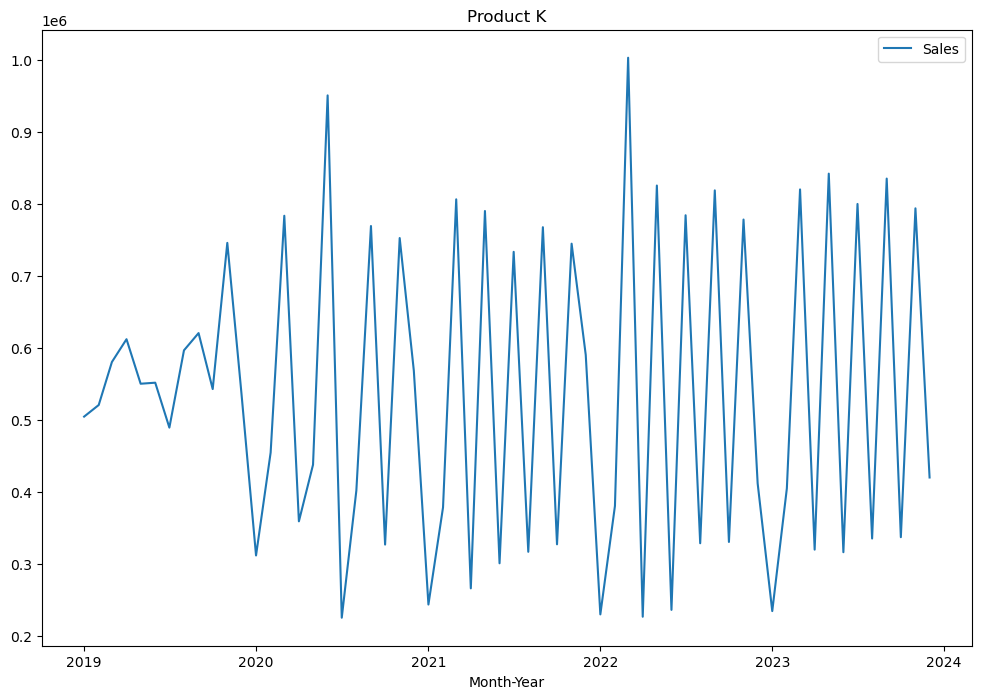

In [22]:
plt.figure(figsize=(12,8))
sns.lineplot(sales_k)
plt.title('Product K')

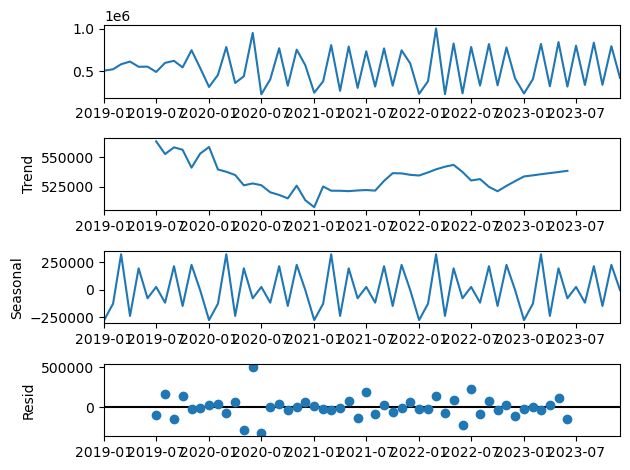

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(sales_k, model='additive', period=12)

# Plot the decomposition
fig = decomposition.plot()
plt.show()


In [24]:
train= sales_k[:54]
test=sales_k[54:]

In [25]:
len(train)

54

In [26]:
model=ExponentialSmoothing(train,trend='add', seasonal='add', seasonal_periods=12).fit()

C:\Users\Maaz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Maaz\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [27]:
pred=model.forecast(6)

In [28]:
pred

2023-07-01    442960.771414
2023-08-01    403398.774347
2023-09-01    679233.116586
2023-10-01    357255.702953
2023-11-01    706645.307149
2023-12-01    523550.613412
Freq: MS, dtype: float64

Text(0.5, 1.0, 'Product K')

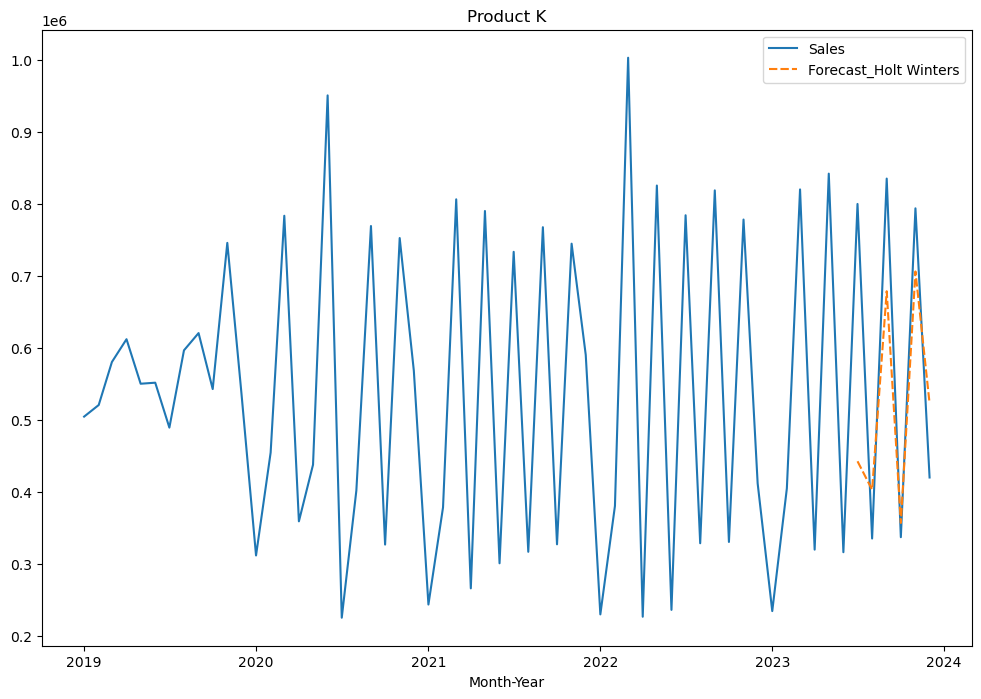

In [29]:
sales_k['Forecast_Holt Winters']=[None]*len(train) + list(pred)
plt.figure(figsize=(12,8))
sns.lineplot(sales_k)
plt.title('Product K')

In [30]:
mae= mean_absolute_error(test,pred)
mse=mean_squared_error(test, pred)
mape= mean_absolute_percentage_error(test,pred)
rmse= np.sqrt(mean_squared_error(test, pred))

print(f'MAE - Holt Winters: {mae}')
print(f'MAPE - Holt Winters: {mape}')
print(f'MSE - Holt Winters: {mse}')
print(f'RMSE - Holt Winters: {rmse}')

MAE - Holt Winters: 132085.14926052978
MAPE - Holt Winters: 0.20838537566637727
MSE - Holt Winters: 29274183718.841656
RMSE - Holt Winters: 171097.00090545614
